In [62]:
#import the necessary libraries
import pandas as pd #data manipulation
import numpy as np #Numerical Analysis
import seaborn as sns #data visualization
import json #for reading json object
import matplotlib.pyplot as plt #data visualization
import pickle # For saving the model file
from wordcloud import WordCloud #to create word clouds
from ast import literal_eval#to evaluate the string as pyhton expression

In [63]:
credits=pd.read_csv('tmdb_5000_credits.csv')
movies=pd.read_csv('tmdb_5000_movies.csv')

In [64]:
credits

movie_id                                     title  \
0        19995                                    Avatar   
1          285  Pirates of the Caribbean: At World's End   
2       206647                                   Spectre   
3        49026                     The Dark Knight Rises   
4        49529                               John Carter   
...        ...                                       ...   
4798      9367                               El Mariachi   
4799     72766                                 Newlyweds   
4800    231617                 Signed, Sealed, Delivered   
4801    126186                          Shanghai Calling   
4802     25975                         My Date with Drew   

                                                   cast  \
0     [{"cast_id": 242, "character": "Jake Sully", "...   
1     [{"cast_id": 4, "character": "Captain Jack Spa...   
2     [{"cast_id": 1, "character": "James Bond", "cr...   
3     [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4     [{"cast_id": 5, "character": "John Carter", "c...   
...                                                 ...   
4798  [{"cast_id": 1, "character": "El Mariachi", "c...   
4799  [{"cast_id": 1, "character": "Buzzy", "credit_...   
4800  [{"cast_id": 8, "character": "Oliver O\u2019To...   
4801  [{"cast_id": 3, "character": "Sam", "credit_id...   
4802  [{"cast_id": 3, "character": "Herself", "credi...   

                                                   crew  
0     [{"credit_id": "52fe48009251416c750aca23", "de...  
1     [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2     [{"credit_id": "54805967c3a36829b5002c41", "de...  
3     [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4     [{"credit_id": "52fe479ac3a36847f813eaa3", "de...  
...                                                 ...  
4798  [{"credit_id": "52fe44eec3a36847f80b280b", "de...  
4799  [{"credit_id": "52fe487dc3a368484e0fb013", "de...  
4800  [{"credit_id": "52fe4df3c3a36847f8275ecf", "de...  
4801  [{"credit_id": "52fe4ad9c3a368484e16a36b", "de...  
4802  [{"credit_id": "58ce021b9251415a390165d9", "de...  

[4803 rows x 4 columns]

In [65]:
movies

budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801          0                                                 []   
4802          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.go.com/disneypictures/pirates/     285   
2           http://www.sonypictures.com/movies/spectre/  206647   
3                    http://www.thedarkknightrises.com/   49026   
4                  http://movies.disney.com/john-carter   49529   
...                                                 ...     ...   
4798                                                NaN    9367   
4799                                                NaN   72766   
4800  http://www.hallmarkchannel.com/signedsealeddel...  231617   
4801                        http://shanghaicalling.com/  126186   
4802                                                NaN   25975   

                                               keywords original_language  \
0     [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1     [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2     [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3     [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4     [{"id": 818, "name": "based on novel"}, {"id":...                en   
...                                                 ...               ...   
4798  [{"id": 5616, "name": "united states\u2013mexi...                es   
4799                                                 []                en   
4800  [{"id": 248, "name": "date"}, {"id": 699, "nam...                en   
4801                                                 []                en   
4802  [{"id": 1523, "name": "obsession"}, {"id": 224...                en   

                                original_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4798                               El Mariachi   
4799                                 Newlyweds   
4800                 Signed, Sealed, Delivered   
4801                          Shanghai Calling   
4802                         My Date with Drew   

                                               overview  popularity  \
0     In the 22nd century, a paraplegic Marine is di...  150.437577   
1     Captain Barbossa, long believed to be dead, ha...  139.082615   
2     A cryptic message from Bond’s past sends him o...  107.376788   
3     Following the death of District Attorney Harve...  112.312950   
4     John Carter is a war-weary, former military ca...   43.926995   
...                                                 ...         ...   
4798  El Mariachi just wants to play his guitar and ...   14.269792   
4799  A newlywed couple's honeymoon is upended by th...    0.642552   
4800  "Signed, Sealed, Delivered" introduces a dedic...    1.444476   
4801  When ambitious New York attorney Sam is sent t...    0.857008   
4802  Ever since the second grade when he first saw ... 

In [66]:
credits['crew'] = credits['crew'].apply(json.loads)
def director(x):
  for i in x:
    if i['job'] == 'Director':
      return i['name']
credits['crew'] = credits['crew'].apply(director)
credits.rename(columns={'crew':'director' }, inplace=True)

In [67]:
from ast import literal_eval
features = ['keywords','genres']
for feature in features:
  movies[feature] = movies[feature].apply(literal_eval)

In [68]:
def get_list(x):
  if isinstance(x, list):
    names = [i['name'] for i in x]
#Check if more than 3 elements exist. If yes, return only first
  if len(names) > 1:
    names = names[:1]
    return names
#Return empty list in case of missing/malformed data
  return []

In [69]:
features = ['keywords', 'genres']
for feature in features:
  movies [feature] = movies [feature].apply(get_list)

In [70]:
movies['genres']

0          [Action]
1       [Adventure]
2          [Action]
3          [Action]
4          [Action]
           ...     
4798       [Action]
4799       [Comedy]
4800       [Comedy]
4801             []
4802             []
Name: genres, Length: 4803, dtype: object

In [71]:
movies['genres'] = movies['genres'].str.join(',')

In [72]:
movies['genres']

0          Action
1       Adventure
2          Action
3          Action
4          Action
          ...    
4798       Action
4799       Comedy
4800       Comedy
4801             
4802             
Name: genres, Length: 4803, dtype: object

In [73]:
movies.head()

budget     genres                                      homepage      id  \
0  237000000     Action                   http://www.avatarmovie.com/   19995   
1  300000000  Adventure  http://disney.go.com/disneypictures/pirates/     285   
2  245000000     Action   http://www.sonypictures.com/movies/spectre/  206647   
3  250000000     Action            http://www.thedarkknightrises.com/   49026   
4  260000000     Action          http://movies.disney.com/john-carter   49529   

           keywords original_language  \
0   [culture clash]                en   
1           [ocean]                en   
2             [spy]                en   
3       [dc comics]                en   
4  [based on novel]                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

In [74]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [75]:
movies = movies.dropna (subset = ['runtime'])

In [76]:
movies ["revenue"]=movies ["revenue"].floordiv (1000000)
movies ["budget"]=movies["budget"].floordiv(1000000)

C:\Users\vfdfdbfd\AppData\Local\Temp\ipykernel_272\3715321792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies ["revenue"]=movies ["revenue"].floordiv (1000000)
C:\Users\vfdfdbfd\AppData\Local\Temp\ipykernel_272\3715321792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies ["budget"]=movies["budget"].floordiv(1000000)


In [77]:
movies = movies [movies['budget'] != 0]

In [78]:
import pandas as pd

# Assuming movies is your existing DataFrame with a 'release_date' column

# Convert 'release_date' to datetime format, handling errors
movies['release_date'] = pd.to_datetime(movies['release_date'], format="%Y-%m-%d", errors='coerce')
# The format was corrected to %Y-%m-%d and errors set to 'coerce' to handle invalid dates

# Extract month from 'release_date'
movies['release_month'] = movies['release_date'].dt.month

# Extract day of the week (DOW) from 'release_date'
movies['release_DOW'] = movies['release_date'].dt.dayofweek


Text(0.5, 1.0, 'Boxplot of Runtime')

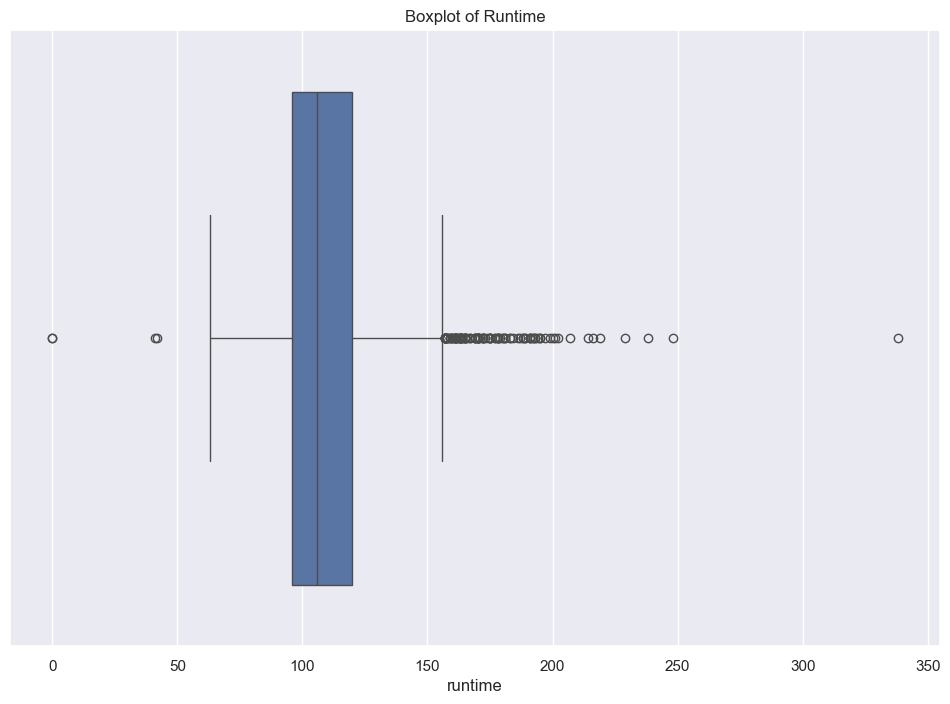

In [79]:
sns.boxplot(x=movies['runtime'])
plt.title('Boxplot of Runtime')

In [80]:
sns.boxplot(x=movies['revenue'])
plt.title('Boxplot of Revenue')

Text(0.5, 1.0, 'Boxplot of Revenue')

Text(0.5, 1.0, 'Boxplot of Budget')

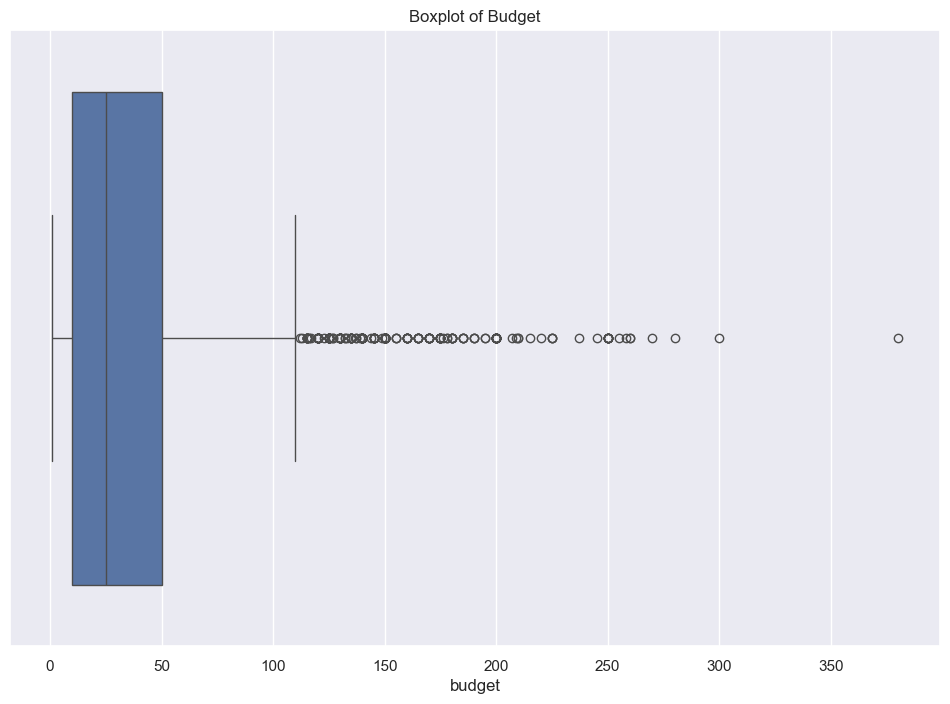

In [81]:
sns.boxplot(x=movies['budget'])
plt.title('Boxplot of Budget')

In [82]:
# Select only the numeric columns before calculating the correlation
numeric_movies = movies.select_dtypes(include=['float', 'int'])

# Calculate the correlation matrix on the numeric data
sns.heatmap(numeric_movies.corr(), cmap='YlGnBu', annot=True, linewidths = 0.2);

In [83]:
movies['log_revenue'] = np.log1p (movies['revenue']) #we are not using logo to avoid a
movies['log_budget'] = np.log1p (movies['budget'])

In [84]:
fig, ax = plt.subplots (figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(movies ['revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)
plt.hist(movies['log_revenue']);
plt.title('Distribution of log transformation of revenue');

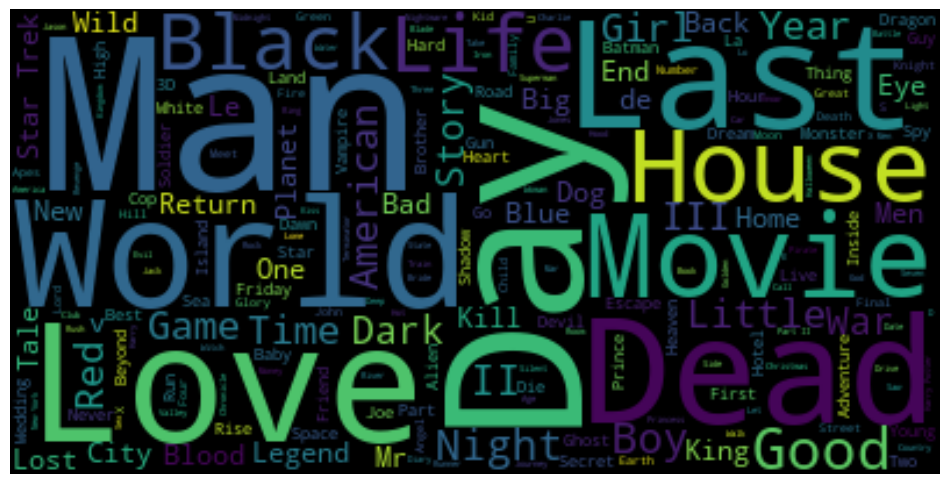

In [85]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate (movies.original_title.to_string())
sns.set(rc={'figure.figsize': (12,8)})
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Revenue for movie with and w/o homepage')

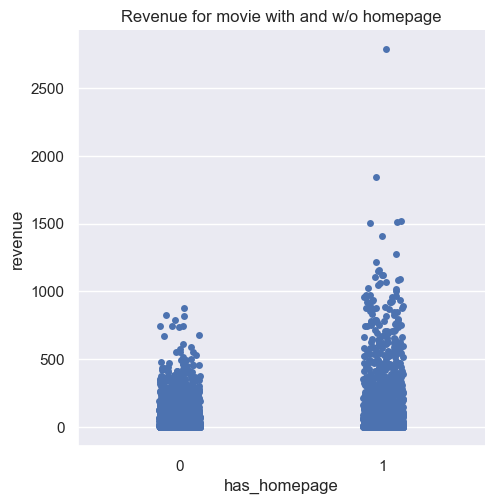

In [86]:
movies['has_homepage'] = 0
movies.loc[movies['homepage'].isnull() == False, 'has_homepage'] = 1 #1 here means it has home page
#since has_homepage is categorical value we will be using seaborn catplot.
sns.catplot(x='has_homepage', y='revenue', data=movies);
plt.title('Revenue for movie with and w/o homepage')

<Figure size 1500x800 with 0 Axes>

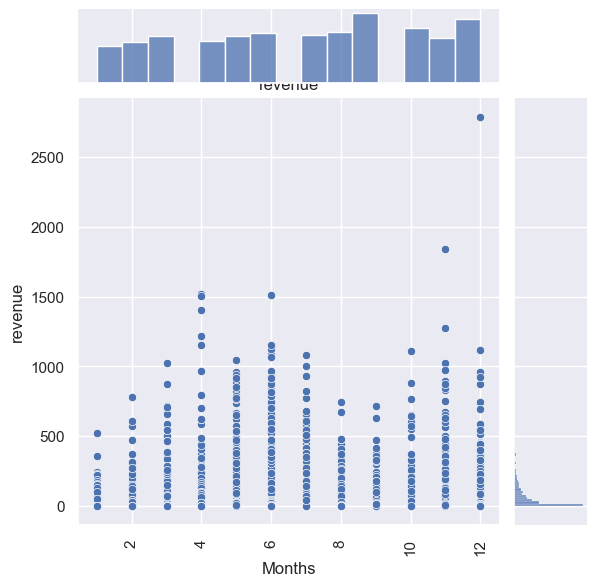

In [87]:
plt.figure(figsize=(15,8))
sns.jointplot(x='release_month', y='revenue', data=movies)  # Pass data as a DataFrame with column names
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.title('revenue')
plt.show()

In [88]:
movies_box = movies.drop(['homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'production_countries',
'production_countries', 'release_date', 'spoken_languages', 'status', 'tagline',
 'log_revenue', 'log_budget', 'has_homepage','title','production_companies'], axis = 1)
print(movies_box.head())

   budget     genres  popularity  revenue  runtime  vote_average  vote_count  \
0     237     Action  150.437577     2787    162.0           7.2       11800   
1     300  Adventure  139.082615      961    169.0           6.9        4500   
2     245     Action  107.376788      880    148.0           6.3        4466   
3     250     Action  112.312950     1084    165.0           7.6        9106   
4     260     Action   43.926995      284    132.0           6.1        2124   

   release_month  release_DOW  
0             12            3  
1              5            5  
2             10            0  
3              7            0  
4              3            2  


In [89]:
movies_box.isnull().sum ()
print(movies_box.head())

   budget     genres  popularity  revenue  runtime  vote_average  vote_count  \
0     237     Action  150.437577     2787    162.0           7.2       11800   
1     300  Adventure  139.082615      961    169.0           6.9        4500   
2     245     Action  107.376788      880    148.0           6.3        4466   
3     250     Action  112.312950     1084    165.0           7.6        9106   
4     260     Action   43.926995      284    132.0           6.1        2124   

   release_month  release_DOW  
0             12            3  
1              5            5  
2             10            0  
3              7            0  
4              3            2  


In [90]:
# Label encoding features to change categorical variables into numerical one
from sklearn.preprocessing import LabelEncoder
from collections import Counter as c
cat=['genres']
for i in movies_box[cat]: #Looping through all the categorical columns
  print("LABEL ENCODING OF:", i)
LE = LabelEncoder() #creating an object of LabelEncoder
print(c(movies_box[i])) #getting the classes values before transformation
movies_box[i] = LE.fit_transform(movies_box[i]) # trannsforming our text
print(c(movies_box[i])) #

LABEL ENCODING OF: genres
Counter({'Action': 632, 'Drama': 598, '': 587, 'Comedy': 522, 'Adventure': 291, 'Horror': 171, 'Crime': 162, 'Thriller': 125, 'Animation': 105, 'Fantasy': 96, 'Romance': 75, 'Science Fiction': 71, 'Family': 41, 'Mystery': 29, 'Music': 20, 'History': 18, 'War': 18, 'Western': 8, 'Documentary': 7, 'TV Movie': 1})
Counter({1: 632, 7: 598, 0: 587, 4: 522, 2: 291, 11: 171, 5: 162, 17: 125, 3: 105, 9: 96, 14: 75, 15: 71, 8: 41, 13: 29, 12: 20, 10: 18, 18: 18, 19: 8, 6: 7, 16: 1})


In [91]:
import joblib
joblib.dump(LE,'label.pkl')

['label.pkl']

In [92]:
mapping_dict={}
category_col=["genres"]
for col in category_col:
  le_name_mapping = dict(zip(LE.classes_,LE.transform(LE.classes_)))
  mapping_dict[col]= le_name_mapping
  print(mapping_dict)

{'genres': {'': np.int64(0), 'Action': np.int64(1), 'Adventure': np.int64(2), 'Animation': np.int64(3), 'Comedy': np.int64(4), 'Crime': np.int64(5), 'Documentary': np.int64(6), 'Drama': np.int64(7), 'Family': np.int64(8), 'Fantasy': np.int64(9), 'History': np.int64(10), 'Horror': np.int64(11), 'Music': np.int64(12), 'Mystery': np.int64(13), 'Romance': np.int64(14), 'Science Fiction': np.int64(15), 'TV Movie': np.int64(16), 'Thriller': np.int64(17), 'War': np.int64(18), 'Western': np.int64(19)}}


In [93]:
y=movies_box.iloc[:,3]
y=pd.DataFrame(y,columns=['revenue'])
y

revenue
0        2787
1         961
2         880
3        1084
4         284
...       ...
4586      170
4596        0
4682        0
4720       15
4758        0

[3577 rows x 1 columns]

In [94]:
x=movies_box.iloc[:, [0,1,2,4,5,6,7,8]]
x=pd.DataFrame(x,columns=['budget', 'genres', 'popularity', 'runtime', 'vote_average', 'vote_count', 'release_month', 'release_DOW'])
print(x)

      budget  genres  popularity  runtime  vote_average  vote_count  \
0        237       1  150.437577    162.0           7.2       11800   
1        300       2  139.082615    169.0           6.9        4500   
2        245       1  107.376788    148.0           6.3        4466   
3        250       1  112.312950    165.0           7.6        9106   
4        260       1   43.926995    132.0           6.1        2124   
...      ...     ...         ...      ...           ...         ...   
4586      35       4   38.100488     99.0           5.8         923   
4596       6       0   19.331884     89.0           6.0         316   
4682      13       0    4.009379     95.0           4.6          24   
4720       8       0    9.452808    120.0           6.5         178   
4758       4      17   27.662696     95.0           5.8         631   

      release_month  release_DOW  
0                12            3  
1                 5            5  
2                10            0  
3      

In [95]:
from sklearn.preprocessing import StandardScaler
import pickle

# Assuming you have training data in a DataFrame `X_train`
scaler = StandardScaler()
scaler.fit(x)  # Fit the scaler on training data

# Save the scaler to a file
with open('scalar.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [96]:
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [97]:
x_train

budget  genres  popularity  runtime  vote_average  vote_count  \
4046       2      12    1.606314    107.0           6.9          18   
4399       1       7    1.260314     81.0           6.6          32   
4368       1       4    9.954848     92.0           6.7         191   
121      150       2   81.781591    105.0           5.9        1971   
1898      26       4   10.006282     90.0           5.4          66   
...      ...     ...         ...      ...           ...         ...   
855       56       7    4.362535    214.0           6.1          48   
3865       3       0  192.528841    105.0           8.3        4254   
1746      35       4    6.248273    114.0           5.7          57   
2921      12       1    3.944870     96.0           3.9          74   
3076      10       7    3.007816    140.0           6.4          25   

      release_month  release_DOW  
4046              7            4  
4399              1            0  
4368              6            6  
121               5            2  
1898             12            4  
...             ...          ...  
855               2            4  
3865             10            4  
1746              2            4  
2921              5            0  
3076              9            5  

[2503 rows x 8 columns]

In [98]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_


array([[ 1.70656575, -0.7914747 ,  0.18928245,  0.08163587, -1.22172291,
         0.06780797,  0.86988569, -0.10188458]])

In [99]:
import pickle


In [100]:
# Dump the model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [101]:
# Load the model from the file
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


In [102]:
input=[[50,8,20.239061,88, 5, 366, 719,7]]


In [103]:
model.predict(input)

c:\Users\vfdfdbfd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[705.91697464]])

In [104]:
x

budget  genres  popularity  runtime  vote_average  vote_count  \
0        237       1  150.437577    162.0           7.2       11800   
1        300       2  139.082615    169.0           6.9        4500   
2        245       1  107.376788    148.0           6.3        4466   
3        250       1  112.312950    165.0           7.6        9106   
4        260       1   43.926995    132.0           6.1        2124   
...      ...     ...         ...      ...           ...         ...   
4586      35       4   38.100488     99.0           5.8         923   
4596       6       0   19.331884     89.0           6.0         316   
4682      13       0    4.009379     95.0           4.6          24   
4720       8       0    9.452808    120.0           6.5         178   
4758       4      17   27.662696     95.0           5.8         631   

      release_month  release_DOW  
0                12            3  
1                 5            5  
2                10            0  
3                 7            0  
4                 3            2  
...             ...          ...  
4586              5            2  
4596             12            2  
4682              1            4  
4720              9            4  
4758              3            5  

[3577 rows x 8 columns]

In [105]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

c:\Users\vfdfdbfd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [106]:
# Dump the model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
